In [1]:
# Standard library imports, and Visualization, Statistics, SciKit libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Ignore Warning messages
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [2]:
# Load churn dataset into a Pandas dataframe
churn_df = pd.read_csv('churn_clean.csv', index_col=0)

In [3]:
# List columns in the dataframe
churn_df.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [4]:
# Verify the number of records and columns in the dataset
churn_df.shape

(10000, 49)

In [5]:
# Verify headers of imported dataset
churn_df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [6]:
# Verify dataset info
churn_df.info

<bound method DataFrame.info of           Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...               ...                                   ...   
9996          M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9997          D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9998          I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9999          I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
10000          T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                        UID          City State  \
CaseOrder                                                         
1          e88

In [7]:
# Describe Churn dataset
churn_df.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [8]:
# List features available in the dataset
churn_df.dtypes

Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBa

In [9]:
# Rename 8 customer survey features to represent descriptions for clarity
churn_df.rename(columns = {'Item1':'TimelyResponse', 
                    'Item2':'Fixes', 
                     'Item3':'Replacements', 
                     'Item4':'Reliability', 
                     'Item5':'Options', 
                     'Item6':'Respectfulness', 
                     'Item7':'Courteous', 
                     'Item8':'Listening'}, 
          inplace=True)

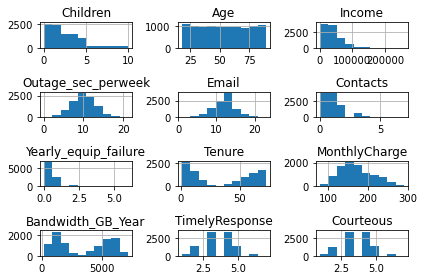

In [10]:
# Display histograms of continuous & categorical variables
churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 
          'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'Courteous']].hist()
plt.savefig('classification_pyplot.jpg')
plt.tight_layout()

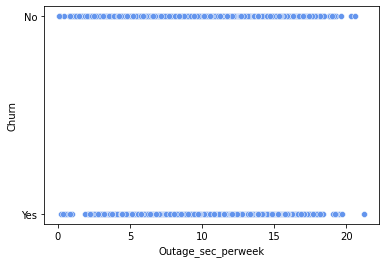

In [11]:
# Scatterplot to show correlations between Churn and Outage_sec_perweek 
sns.scatterplot(x=churn_df['Outage_sec_perweek'], y=churn_df['Churn'], color='cornflowerblue')
plt.show();

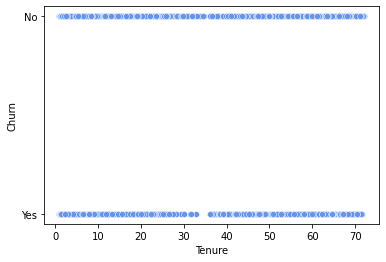

In [12]:
# Scatterplot to show correlations between Churn and Tenure
sns.scatterplot(x=churn_df['Tenure'], y=churn_df['Churn'], color='cornflowerblue')
plt.show();

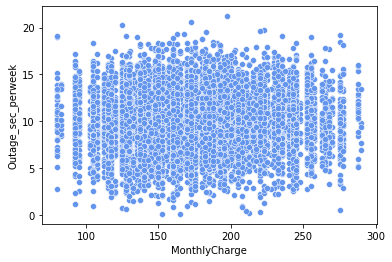

In [13]:
# Scatterplot to show correlations between MonthlyCharge and Outage_sec_perweek
sns.scatterplot(x=churn_df['MonthlyCharge'], y=churn_df['Outage_sec_perweek'], color='cornflowerblue')
plt.show();

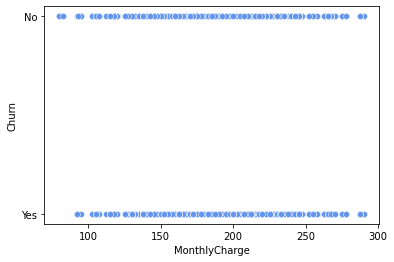

In [14]:
# Scatterplot to show correlations between MonthlyCharge against Churn
sns.scatterplot(x = churn_df['MonthlyCharge'], y = churn_df['Churn'], color='cornflowerblue')
plt.show();

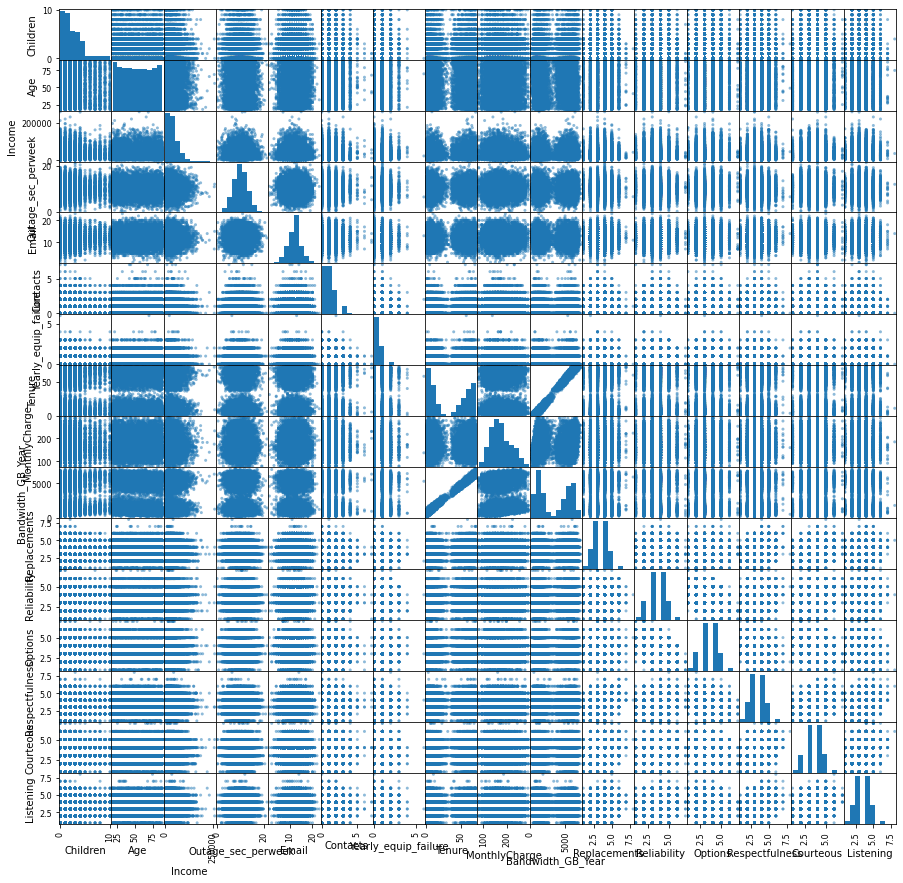

In [15]:
# Scatter matrixes of numeric variables for a broad overview of possible relationships.
churn_numeric = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 
                          'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 
                          'MonthlyCharge', 'Bandwidth_GB_Year', 'Replacements', 
                          'Reliability', 'Options', 'Respectfulness', 'Courteous', 
                          'Listening']]

pd.plotting.scatter_matrix(churn_numeric, figsize = [15, 15]);

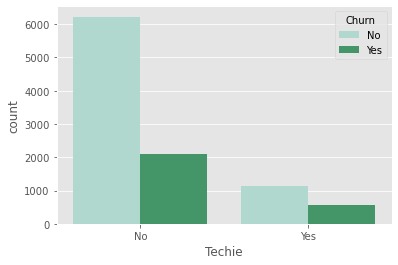

In [16]:
# Enable ggplot
plt.style.use('ggplot')

# Countplot to show relationship of binary feature techie and churn
plt.figure()
sns.countplot(x='Techie', hue='Churn', data=churn_df, palette='BuGn')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

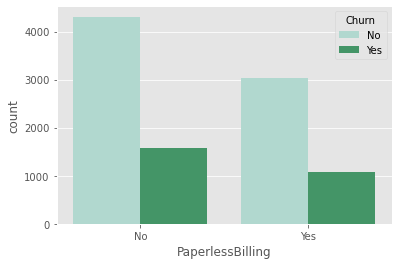

In [17]:
# Countplot to show relationship of binary feature PaperlessBilling and churn
plt.figure()
sns.countplot(x='PaperlessBilling', hue='Churn', data=churn_df, palette='BuGn')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

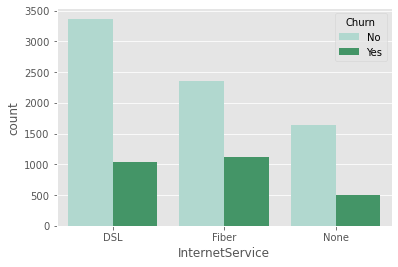

In [18]:
# Countplot to show relationship of binary feature InternetService and churn
plt.figure()
sns.countplot(x='InternetService', hue='Churn', data=churn_df, palette='BuGn')
plt.xticks([0,1,2], ['DSL', 'Fiber', 'None'])
plt.show()

<AxesSubplot:>

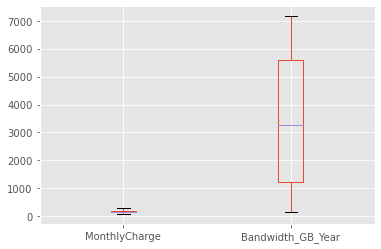

In [19]:
# Boxplot for continuous & categorical variables MonthlyCharge and Bandwidth_GB_Year
churn_df.boxplot(column=['MonthlyCharge','Bandwidth_GB_Year'])

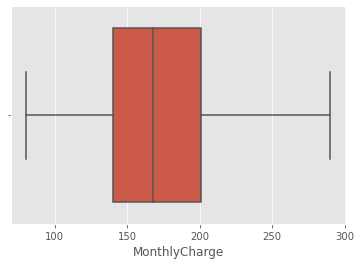

In [20]:
# Boxplot for MonthlyCharge
sns.boxplot('MonthlyCharge', data = churn_df)
plt.show()

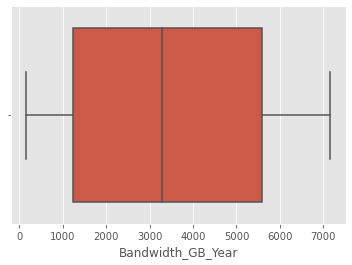

In [21]:
# Boxplot for Bandwidth_GB_Year
sns.boxplot('Bandwidth_GB_Year', data = churn_df)
plt.show()

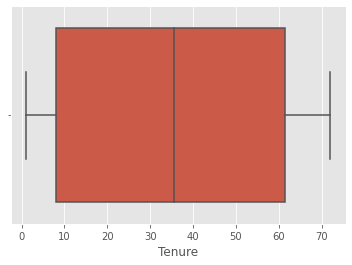

In [22]:
# Boxplot for Tenure
sns.boxplot('Tenure', data = churn_df)
plt.show()

In [23]:
# Verify missing data points
data_nulls = churn_df.isnull().sum()
print(data_nulls)

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

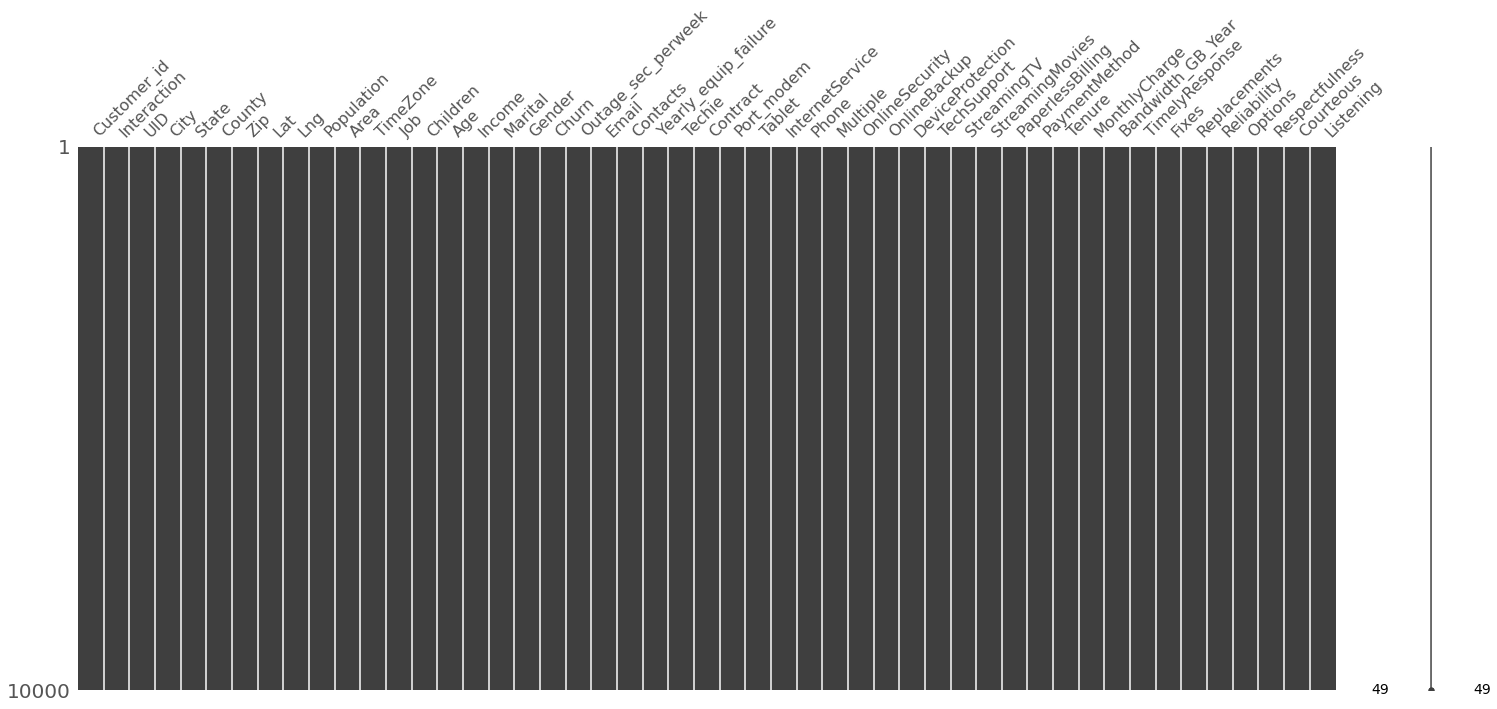

In [24]:
# Visualize missing values in dataset using missingno

!pip install missingno
import missingno as msno

# Display matrix to visualize any missing values
msno.matrix(churn_df);

In [25]:
# Convert all "Yes/No" data into binary "1/0" representation
churn_df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in churn_df['Churn']]
churn_df['DummyContract'] = [1 if v == 'Two Year' else 0 for v in churn_df['Contract']]
churn_df['DummyDeviceProtection'] = [1 if v == 'Yes' else 0 for v in churn_df['DeviceProtection']]
churn_df['DummyGender'] = [1 if v == 'Male' else 0 for v in churn_df['Gender']]
churn_df['DummyInternetService'] = [1 if v == 'Fiber Optic' else 0 for v in churn_df['InternetService']]
churn_df['DummyMultiple'] = [1 if v == 'Yes' else 0 for v in churn_df['Multiple']]
churn_df['DummyOnlineBackup'] = [1 if v == 'Yes' else 0 for v in churn_df['OnlineBackup']]
churn_df['DummyOnlineSecurity'] = [1 if v == 'Yes' else 0 for v in churn_df['OnlineSecurity']]
churn_df['DummyPaperlessBilling'] = [1 if v == 'Yes' else 0 for v in churn_df['PaperlessBilling']]
churn_df['DummyPhone'] = [1 if v == 'Yes' else 0 for v in churn_df['Phone']]
churn_df['DummyPort_modem'] = [1 if v == 'Yes' else 0 for v in churn_df['Port_modem']]
churn_df['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in churn_df['StreamingTV']]
churn_df['DummyTablet'] = [1 if v == 'Yes' else 0 for v in churn_df['Tablet']]
churn_df['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in churn_df['TechSupport']]
churn_df['DummyTechie'] = [1 if v == 'Yes' else 0 for v in churn_df['Techie']]
churn_df['StreamingMovies'] = [1 if v == 'Yes' else 0 for v in churn_df['StreamingMovies']]

In [26]:
# Remove redundant 'yes/no' features from dataframe
churn_df = churn_df.drop(columns=['Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 
                                  'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 
                                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling'])

In [27]:
# Remove features not relevant to the proposed analysis question
churn_df = churn_df.drop(columns=['Customer_id', 'Interaction', 'UID', 
                            'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 
                            'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod'])
churn_df.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,...,DummyMultiple,DummyOnlineBackup,DummyOnlineSecurity,DummyPaperlessBilling,DummyPhone,DummyPort_modem,DummyStreamingTV,DummyTablet,DummyTechSupport,DummyTechie
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,...,0,1,1,1,1,1,0,1,0,0
2,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,...,1,0,1,1,1,0,1,1,0,1
3,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,...,1,0,0,1,1,1,0,0,0,1
4,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,...,0,0,1,1,1,0,1,0,0,1
5,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,...,0,0,0,0,0,1,1,0,1,0


In [28]:
# DummyChurn set as target and moved to end of features
churn_df = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
        'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening',
       'DummyGender', 'DummyTechie', 'DummyContract',
       'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 'DummyPhone',
       'DummyMultiple', 'DummyOnlineSecurity', 'DummyOnlineBackup',
       'DummyDeviceProtection', 'DummyTechSupport', 'DummyStreamingTV',
       'DummyPaperlessBilling', 'DummyChurn',]]

churn_df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyPaperlessBilling,DummyChurn
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,...,1,1,0,1,1,0,0,0,1,0
2,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,...,1,1,1,1,0,0,0,1,1,1
3,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,...,0,1,1,0,0,0,0,0,1,0
4,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,...,0,1,0,1,0,0,0,1,1,0
5,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,...,1,0,0,0,0,0,1,1,0,1


In [29]:
# Display features in churn dataframe
features = (list(churn_df.columns[:-1]))
print('Analysis Features: \n', features)

Analysis Features: 
 ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening', 'DummyGender', 'DummyTechie', 'DummyContract', 'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 'DummyPhone', 'DummyMultiple', 'DummyOnlineSecurity', 'DummyOnlineBackup', 'DummyDeviceProtection', 'DummyTechSupport', 'DummyStreamingTV', 'DummyPaperlessBilling']


In [30]:
# Extract cleaned dataset to CSV
churn_df.to_csv('churn_classification.csv')

In [31]:
# Import previously prepared dataset
churn_df = pd.read_csv('churn_classification.csv')

# Set DummyChurn predictor features & target
X = churn_df.drop('DummyChurn', axis=1).values
y = churn_df['DummyChurn'].values

In [32]:
# Import SKLearn KNN model, Classifier, accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

In [33]:
# Enable seed to objectionally verify results later and create training/test sets
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [34]:
# Load KNN model, fit data, and outcomes 
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [35]:
# Extract Test Set to CSV
print(y_test)
pd.DataFrame(y_test).to_csv("test_set.csv")

[0 0 1 ... 0 1 1]


In [36]:
# Extract Training Set to CSV
print(y_pred)
pd.DataFrame(y_pred).to_csv("training_set.csv")

[0 0 0 ... 0 1 0]


In [37]:
# KNN model accuracy score
print('KNN model accuracy: ', accuracy_score(y_test, y_pred))

KNN model accuracy:  0.7145


In [38]:
# Display classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1442
           1       0.49      0.40      0.44       558

    accuracy                           0.71      2000
   macro avg       0.63      0.62      0.62      2000
weighted avg       0.70      0.71      0.71      2000



In [39]:
# From SKLearn import scaler, pipeline, and accuracy
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Define steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

# Create pipeline instance
pipeline = Pipeline(steps)

# Separate dataframe
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.2, random_state = SEED)

# Fit pipeline
knn_scaled = pipeline.fit(X_train_scaled, y_train_scaled)

# Pipepline Prediction
y_pred_scaled = pipeline.predict(X_test_scaled)

In [40]:
# Updated KNN model accuracy score
print('Updated KNN model accuracy: {:0.3f}'.format(accuracy_score(y_test_scaled, y_pred_scaled)))

Updated KNN model accuracy: 0.790


In [41]:
# Display classification report
print(classification_report(y_test_scaled, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1442
           1       0.64      0.56      0.60       558

    accuracy                           0.79      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.78      0.79      0.79      2000



In [42]:
# Import SKLearn confusion matrix library and print results
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1204  238]
 [ 333  225]]


<AxesSubplot:>

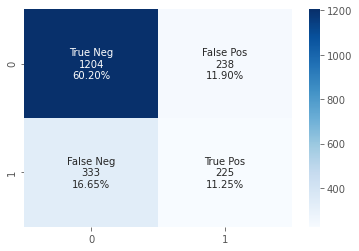

In [43]:
# Display confusion matrix
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [44]:
# Import SKLearn GridSearchCV library in order to use cross validation
from sklearn.model_selection import GridSearchCV

# New parameter grid
param_grid = {'n_neighbors': np.arange(1, 50)}

# New KNN instance for cross validation
knn = KNeighborsClassifier()

# Use GridSearch library for calculation
knn_cv = GridSearchCV(knn , param_grid, cv=5)

# Setup model using fit
knn_cv.fit(X_train, y_train)

# Display parameters
print('KNN model Parameters: {}'.format(knn_cv.best_params_))

KNN model Parameters: {'n_neighbors': 6}


In [45]:
# KNN Model optimal score
print('KNN model Optimal Score: {:.3f}'.format(knn_cv.best_score_))

KNN model Optimal Score: 0.735


In [46]:
# Import Roc_auc_score to calculate integral
from sklearn.metrics import roc_auc_score

# Fit model and calculate probabilities
knn_cv.fit(X, y)

y_pred_prob = knn_cv.predict_proba(X_test)[:,1]

# Print ROC Auc score
print("Area Under Curve validation: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

Area Under Curve validation: 0.7959


In [47]:
# Cross Validate AUC Score
cv_auc = cross_val_score(knn_cv, X, y, cv=5, scoring='roc_auc')

# Display AUC scores
print("AUC scores using 5x cross-validation: {}".format(cv_auc))

AUC scores using 5x cross-validation: [0.68120909 0.17406045 0.96370684 0.96560711 0.58834745]
